# Feature Scaling - Week 10

In [41]:
from pandas import DataFrame
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataset/kreditku.csv")
df

,Durasi,Riwayat_kredit,Tujuan,Jum_kredit,Savings,Masa_kerja,Pekerjaan,Jum_tanggungan,creditScore
0,6,A34,A43,1169,A65,A75,A173,1,1
1,48,A32,A43,5951,A61,A73,A173,1,2
2,12,A34,A46,2096,A61,A74,A172,2,1
3,42,A32,A42,7882,A61,A74,A173,2,1
4,24,A33,A40,4870,A61,A73,A173,2,2
...,...,...,...,...,...,...,...,...,...
144,21,A34,A42,2288,A61,A72,A173,1,1
145,48,A31,A49,3566,A62,A74,A173,1,1
146,6,A34,A40,860,A61,A75,A173,1,1
147,12,A34,A40,682,A62,A74,A173,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         148 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
 8   creditScore     149 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.6+ KB


In [6]:
credit_index = ["loan_status"]
credit_store_df = df[['loan_status']]
credit_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   creditScore  149 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [12]:
is_having_missing = credit_store_df.isnull().values.any()
if not is_having_missing:
    credit_store_df.isnull().sum()

In [13]:
df.creditScore.value_counts()

creditScore
1    112
2     37
Name: count, dtype: int64

In [17]:
df_attr = df.drop(credit_store_df, axis=1)
df_attr.info()
df_attr.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         148 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.4+ KB


(149, 8)

In [19]:
df_attr.isnull().values.any()
df_attr.isnull().sum()

Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           1
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
dtype: int64

In [22]:
category_df = df.select_dtypes(include=["object"])
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Riwayat_kredit  149 non-null    object
 1   Tujuan          149 non-null    object
 2   Savings         148 non-null    object
 3   Masa_kerja      149 non-null    object
 4   Pekerjaan       149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


In [24]:
numerical_df = df.select_dtypes(include=["int64"])
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [27]:
numerical_index = numerical_df.columns
numerical_index

Index(['Durasi', 'Jum_kredit', 'Jum_tanggungan', 'creditScore'], dtype='object')

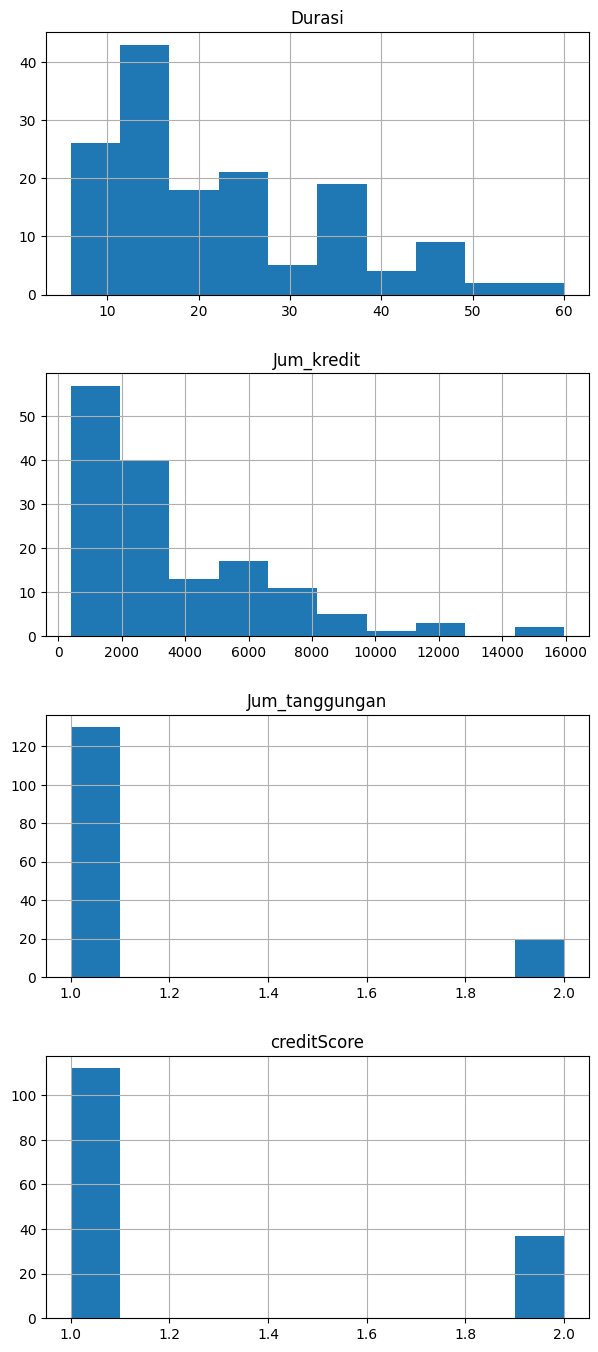

In [36]:
import matplotlib
import matplotlib.pyplot as plt

df.hist(column=numerical_index, figsize=(7,30), layout=(7,1))
plt.show()

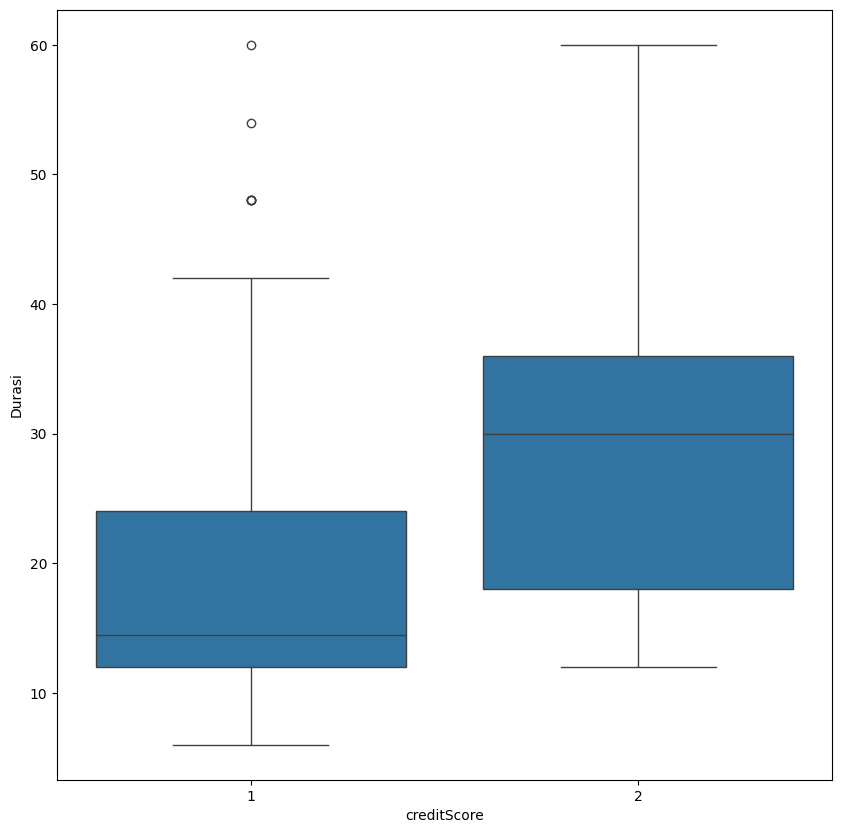

In [37]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.boxplot(x="creditScore", y="Durasi", data=df)
plt.show()

In [39]:
df[["creditScore", "Durasi"]].groupby(["creditScore"], as_index=False).mean().sort_values(by="Durasi", ascending=False)

,creditScore,Durasi
1,2,29.918919
0,1,19.142857


In [49]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Durasi"])) < 3 )]

income_1 = df[df["creditScore"] == 1]['Durasi']
income_0 = df[df["creditScore"] == 2]['Durasi']

income_0 = income_0.values.tolist()
imcome_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest, pval = ttest_ind(income_1, income_0, equal_var=False)
print("ttest", ttest)
print("p value", pval)

if pval < 0.05:
    print("Ho ditolak")
else:
    print("Ho diterima")

ttest -1.5113404425357542
p value 0.1551481625381616
Ho diterima


In [54]:
def bar_chart(feature):
    Accepted = df[df["creditScore"]==1][feature].value_counts()
    Rejected = df[df["creditScore"]==2][feature].value_counts()

    df1 = pd.DataFrame([Accepted, Rejected])
    df1.index=["Accepted", "Rejected"]
    df1.plot(kind="bar", stacked=True, fig=(18,6), title=feature)

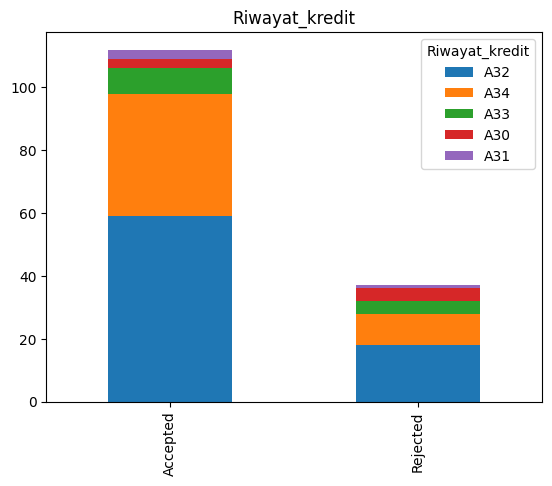

In [55]:
bar_chart("Riwayat_kredit")

In [57]:
c_t = pd.crosstab(df["Riwayat_kredit"], df["creditScore"], margins=False)
c_t

creditScore,1,2
Riwayat_kredit,,
A30,3,4
A31,3,1
A32,59,18
A33,8,4
A34,39,10


In [58]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print("dof=%d", dof)
print("p_value", p)
print(expected)

prob = 0.99
critical = chi2.ppf(prob, dof)
print("Probabilitas=%.3f, critical=%.3f, stat=%.3f", (prob, critical, stat))

if abs(stat) >= critical:
    print("Dependent (tolak H0)")
else:
    print("Independednt (terima H0)")

dof=%d 4
p_value 0.28925705168957533
[[ 5.26174497  1.73825503]
 [ 3.00671141  0.99328859]
 [57.87919463 19.12080537]
 [ 9.02013423  2.97986577]
 [36.83221477 12.16778523]]
Probabilitas=%.3f, critical=%.3f, stat=%.3f (0.99, 13.276704135987622, 4.980956626683666)
Independednt (terima H0)


## Pearson Correlation

In [67]:
plt.figure(figsize=(12,10))
# cor = df.corr()

# sns.heatmap(cor, annot=True)
# plt.show()

# cor_target = abs(cor["creditScore"])

# relevant_features = cor_target[cor_target > 0.1]
# relevant_features
df.corr()

ValueError: could not convert string to float: 'A34'

<Figure size 1200x1000 with 0 Axes>